## 2. Supervised Learning
#### Regression vs Classification
Repetition:
Supervised learning problems can be sub-divided into regression and classification problems.

**Regression** covers situations where **y is continuous/numerical**. 
- Predicting the value of the Dow in 6 months.
- Predicting the price of a given house based on various inputs.

**Classification** covers situations where **y is categorical**
- Will the Dow be up (U) or down (D) in 6 months?
- Is this email a SPAM or not?


### 2.1 Regression
- Linear regression is a simple approach to supervised learning
- It assumes a linear dependence of Y on X1, X2, ... Xn
- Linear Regression is very useful (conceptually and practically)

![adv](../img/2/advertise.png)
source: [ISLR](http://www-bcf.usc.edu/~gareth/ISL/)

Questions linear regression can help us to answer:
1. Is there a relationship between advertising budget and sales? 
2. How strong is the relationship between advertising budget and sales? 
3. Which factors (media) contribute to sales?
4. How accurately can we estimate the effect of each medium on sales? 
5. How accurately can we predict future sales?
6. Is the relationship linear?
7. Is there synergy among the advertising media?

#### 2.1.1 Simple Linear Regression
Simple linear regression assumes there is a linear relationship between x and y.
$$ y = \beta_{0}  + \beta_{1} x $$

![simple linear](../img/2/simple_linear_slope.png)

Let's gererate some random data for regression analysis

<IPython.core.display.Javascript object>


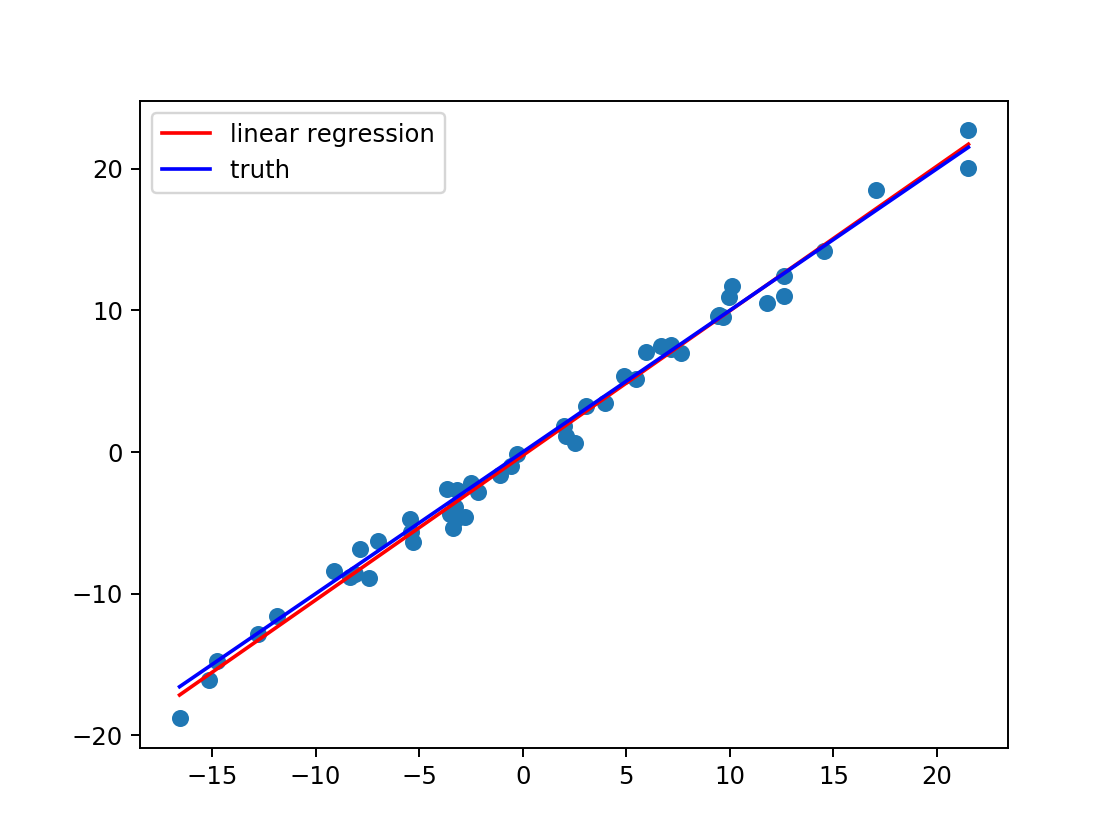

slope:
  true: 1  model:  1.0210055613064375
intercept:
  true: 0  model:  -0.23734508973617274
R-squared:  0.9905044652830253


In [ ]:
%matplotlib notebook
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy as np
import random

# generate random data from a line adding some noise
def generate_regr(n_samples, x_mean, x_std, m, b, y_noise):
    x, y = list(), list()
    for i in range(n_samples):
        x0 = random.gauss(x_mean, x_std)
        y0 = m * x0 + b + (random.gauss(0, y_noise))
        x.append(x0)
        y.append(y0)
    return np.array([x]).transpose(), y

m, b, noise = 1, 0, 1
X, y = generate_regr(50, 0, 10, m, b, noise)

# plot dataset
pyplot.close()
pyplot.scatter(X,y)

# ----------- create a model and fit it to the data ----------
regr_model = LinearRegression()
regr_model.fit(X, y)

# regression line
xl = np.linspace(min(X), max(X), 100)
yl = regr_model.coef_[0] * xl + regr_model.intercept_
yt= m * xl + b

pyplot.plot(xl, yl, '-r', label='linear regression')
pyplot.plot(xl, yt, '-b', label='truth ')
pyplot.legend(loc='upper left')
pyplot.show()

print("slope:")
print("  true:", m, " model: ", regr_model.coef_[0])
print("intercept:")
print("  true:", b, " model: ", regr_model.intercept_)

print("R-squared: ", regr_model.score(X, y))


##### How does this work?

The optimization algorithm tries to find a line for which the **distance of the data points (residuals)** to this line is minimized. The way to *'punish'* this distance is called a **cost function**.

![residuals](../img/2/residuals.png)

source: [ISLR](http://www-bcf.usc.edu/~gareth/ISL/)


There are different **cost funtions** to pick from 
- RSS Residual sum of squares
- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

##### Estimating Coefficients

The algorithm goes through different combintions of the coefficients ($ \beta_{0} ,  \beta_{1}  $) and picks the one with the lowest cost.

$$ y = \beta_{0}  + \beta_{1} x $$

![estimating coefficients](../img/2/coef_estimation.png)
source: [ISLR](http://www-bcf.usc.edu/~gareth/ISL/)

![gradient decent](../img/2/gradient_decent.gif)
source: [Towards Data Science](https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220)



**Gradient Decent** is an algorithm that is used to *go down the slope* to find the minimal cost.

#### 2.1.2 Multiple Linear Regression

### 2.2 Classification
Logistic regression, SVM, Decision Trees

### 2.3 Homework for tomorrow
Think about a use case for machine learning in your department or domain